In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df = df.drop(['id', 'date', 'sqft_lot','sqft_lot15','lat', 'long', 'view'], axis=1)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.007596,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.086825,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000


In [7]:
df.price/df.sqft_living

0        188.050847
1        209.338521
2        233.766234
3        308.163265
4        303.571429
            ...    
21592    235.294118
21593    173.160173
21594    394.216667
21595    250.000000
21596    318.627451
Length: 21597, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 2.3+ MB


In [9]:
df.waterfront = df.waterfront.astype(float)

In [10]:
df.yr_renovated = df.yr_renovated.astype(float)

In [11]:
df.sqft_basement = df.sqft_basement.replace("?", "0")

In [12]:
df.sqft_basement = df.sqft_basement.astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


In [14]:
df.corrwith(df['price']).abs()

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
floors           0.256804
waterfront       0.276295
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
yr_renovated     0.129599
zipcode          0.053402
sqft_living15    0.585241
dtype: float64

### Baseline Testing

In [15]:
#Perform a 75-25 train test split (25% testing data. Use random_state=42)
#defining X and y
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'grade']] #want 2 dimensions of feature
y = df['price'] #want 1 dimension of target

#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [16]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

-509480.91085365147
[-3.46370510e+04 -1.08624623e+04  2.02904348e+02 -3.70155268e+04
  8.39295627e+05  1.06629881e+05]


In [18]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [19]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 236917.88520152608
Baseline Test score: 242163.41839553026


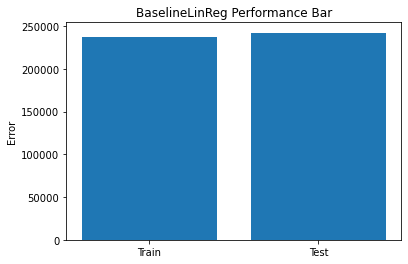

In [20]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('BaselineLinReg Performance Bar');

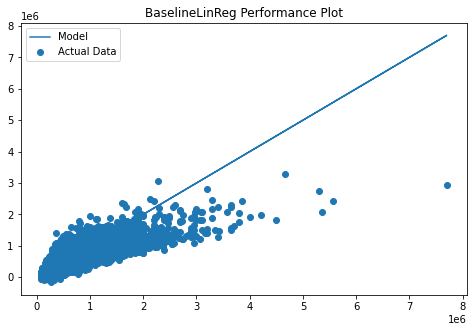

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('BaselineLinReg Performance Plot')
plt.legend();

### Testing with MinMax Scaler

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
#Fit a LinearRegression model
scaledlinreg = LinearRegression()
scaledlinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(scaledlinreg.intercept_)
print(scaledlinreg.coef_)

-191600.46677594737
[-346370.50997995  -81468.466937   2672250.25992874  -92538.81699392
  839295.62658415 1066298.81444366]


In [25]:
#Make predictions on both the training and testing data
train_preds = scaledlinreg.predict(X_train)
test_preds = scaledlinreg.predict(X_test)

In [26]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
scaled_train_score = (mean_squared_error(y_train, train_preds))**.5
scaled_test_score = (mean_squared_error(y_test, test_preds))**.5
print('Scaled Train score:', scaled_train_score)
print('Scale Test score:', scaled_test_score)

Scaled Train score: 236917.88520152608
Scale Test score: 242163.41839553075


In [27]:
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 236917.88520152608
Baseline Test score: 242163.41839553026


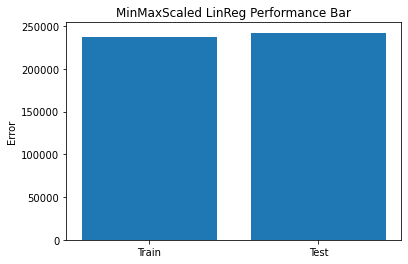

In [28]:
plt.bar(['Train', 'Test'], [scaled_train_score, scaled_test_score])
plt.ylabel('Error')
plt.title('MinMaxScaled LinReg Performance Bar');

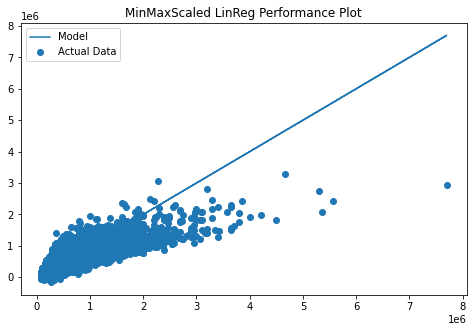

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('MinMaxScaled LinReg Performance Plot')
plt.legend();

Testing with Simple Imputer

In [30]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [31]:
#Fit a LinearRegression model
simplelinreg = LinearRegression()
simplelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(simplelinreg.intercept_)
print(simplelinreg.coef_)

-191600.46677594737
[-346370.50997995  -81468.466937   2672250.25992874  -92538.81699392
  839295.62658415 1066298.81444366]


In [32]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
simple_train_score = (mean_squared_error(y_train, train_preds))**.5
simple_test_score = (mean_squared_error(y_test, test_preds))**.5
print('Simple Train score:', simple_train_score)
print('Simple Test score:', simple_test_score)

Simple Train score: 236917.88520152608
Simple Test score: 242163.41839553075


### Removing / Adding

In [33]:
#Perform a 75-25 train test split (25% testing data. Use random_state=42)
#defining X and y
X = df[['sqft_living']] #want 2 dimensions of feature
y = df['price']
#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [34]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

squaring of y

I took out waterfront and floors and my error was larger...
adding in condition and zipcode

In [35]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

-40987.54093398992
[279.44231431]


In [36]:
((baselinelinreg.coef_) * 1180) + (baselinelinreg.intercept_)

array([288754.38995484])

In [37]:
288754.38995484 - 262216.5180747793

26537.871880060702

In [38]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [39]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 261471.87387302093
Baseline Test score: 262216.5180747793


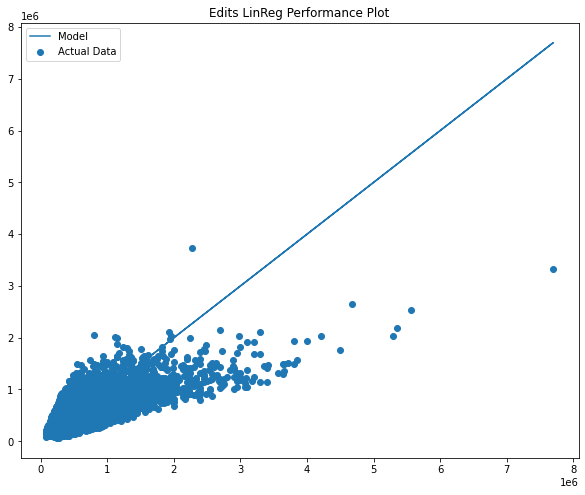

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('Edits LinReg Performance Plot')
plt.legend();

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


In [42]:
df["bathbed"] = df["bathrooms"] * df["bedrooms"]

In [43]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,bathbed
price,1.000000,0.308787,0.525906,0.701917,0.256804,0.276295,0.036056,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.585241,0.516874
bedrooms,0.308787,1.000000,0.514508,0.578212,0.177944,-0.002386,0.026496,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,0.393406,0.802503
bathrooms,0.525906,0.514508,1.000000,0.755758,0.502582,0.067282,-0.126479,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.569884,0.890424
sqft_living,0.701917,0.578212,0.755758,1.000000,0.353953,0.110230,-0.059445,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.756402,0.778108
floors,0.256804,0.177944,0.502582,0.353953,1.000000,0.021883,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.280102,0.385668
waterfront,0.276295,-0.002386,0.067282,0.110230,0.021883,1.000000,0.017642,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,0.088860,0.047676
condition,0.036056,0.026496,-0.126479,-0.059445,-0.264075,0.017642,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.061858,0.002888,-0.093072,-0.071210
grade,0.667951,0.356563,0.665838,0.762779,0.458794,0.087383,-0.146896,1.000000,0.756073,0.165843,0.447865,0.016669,-0.185771,0.713867,0.588452
sqft_above,0.605368,0.479386,0.686668,0.876448,0.523989,0.075463,-0.158904,0.756073,1.000000,-0.051175,0.424037,0.022137,-0.261570,0.731767,0.681310
sqft_basement,0.321108,0.297229,0.278485,0.428660,-0.241866,0.088213,0.168482,0.165843,-0.051175,1.000000,-0.130085,0.071190,0.073271,0.199288,0.333897


agree on a dataframe, outliers, 

In [44]:
df.sort_values(by='price', ascending=False).head(50)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,bathbed
7245,7700000.0,6,8.00,12050,2.5,0.0,4,13,8570,3480.0,1910,1987.0,98102,3940,48.00
3910,7060000.0,5,4.50,10040,2.0,1.0,3,11,7680,2360.0,1940,2001.0,98004,3930,22.50
9245,6890000.0,6,7.75,9890,2.0,0.0,3,13,8860,1030.0,2001,0.0,98039,4540,46.50
4407,5570000.0,5,5.75,9200,2.0,0.0,3,13,6200,3000.0,2001,NaN,98039,3560,28.75
1446,5350000.0,5,5.00,8000,2.0,0.0,3,12,6720,1280.0,2009,0.0,98004,4600,25.00
1313,5300000.0,6,6.00,7390,2.0,1.0,4,12,5000,2390.0,1991,0.0,98040,4320,36.00
1162,5110000.0,5,5.25,8010,2.0,1.0,3,12,5990,2020.0,1999,0.0,98033,3430,26.25
8085,4670000.0,5,6.75,9640,1.0,1.0,3,12,4820,4820.0,1983,2009.0,98040,3270,33.75
2624,4500000.0,5,5.50,6640,2.0,1.0,3,12,6350,290.0,2004,0.0,98155,3030,27.50
8629,4490000.0,4,3.00,6430,2.0,0.0,3,12,6430,0.0,2001,0.0,98004,3720,12.00


In [45]:
X = df[['sqft_living','grade','condition','floors', 'bathbed', 'waterfront', 'yr_built']] #want 2 dimensions of feature
y = (df['price'])
#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

Finding individual coeeficients to make a prediction

In [46]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [47]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

6212900.160259716
[ 1.54817041e+02  1.42932109e+05  2.06371100e+04  3.37237422e+04
  2.54979208e+03  7.92145369e+05 -3.67063567e+03]


In [48]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [49]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 219194.93356510974
Baseline Test score: 228612.7548838456


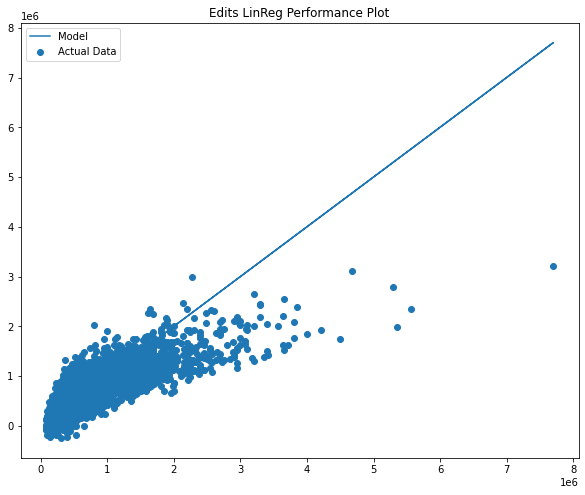

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('Edits LinReg Performance Plot')
plt.legend();

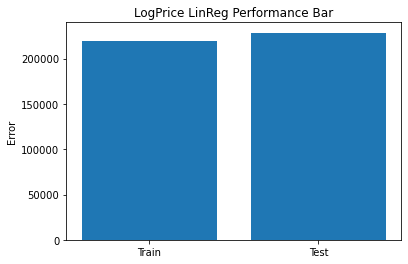

In [51]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('LogPrice LinReg Performance Bar');

In [52]:
cleaneddf = pd.read_csv('cleaned_df')